## Text-to-Image Generation using Stable Diffusion and Diffusers



In [ ]:
#diffusers is a hugging face page for using diffusion models from huggingface hub
!pip install diffusers transformers accelerate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 25.5 MB/s eta 0:00:00


In [ ]:
from diffusers import StableDiffusionPipeline
import matplotlib.pyplot as plt
import torch

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

In [ ]:
!pip show torch

Name: torch
Version: 2.4.1+cu121
Summary: Tensors and Dynamic neural networks in Python with strong GPU acceleration
Home-page: https://pytorch.org/
Author: PyTorch Team
Author-email: packages@pytorch.org
License: BSD-3
Location: /usr/local/lib/python3.10/dist-packages
Requires: filelock, fsspec, jinja2, networkx, sympy, typing-extensions
Required-by: accelerate, fastai, torchaudio, torchvision


In [ ]:
model_id1 = "dreamlike-art/dreamlike-diffusion-1.0"
model_id2 = "stabilityai/stable-diffusion-xl-base-1.0"

pipe = StableDiffusionPipeline.from_pretrained(model_id1, torch_dtype=torch.float16, use_safetensors=True)
pipe = pipe.to("cuda")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/511 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/341 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/807 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/518 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/901 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/1.72G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/577 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

[PROMPT]: A dignified Moroccan elder with traditional fez hat, intricate caftan, wise eyes, detailed wrinkles


  0%|          | 0/50 [00:00<?, ?it/s]

[PROMPT]: Young Moroccan woman in colorful hijab, modern clothing mixed with traditional elements, confident pose


  0%|          | 0/50 [00:00<?, ?it/s]

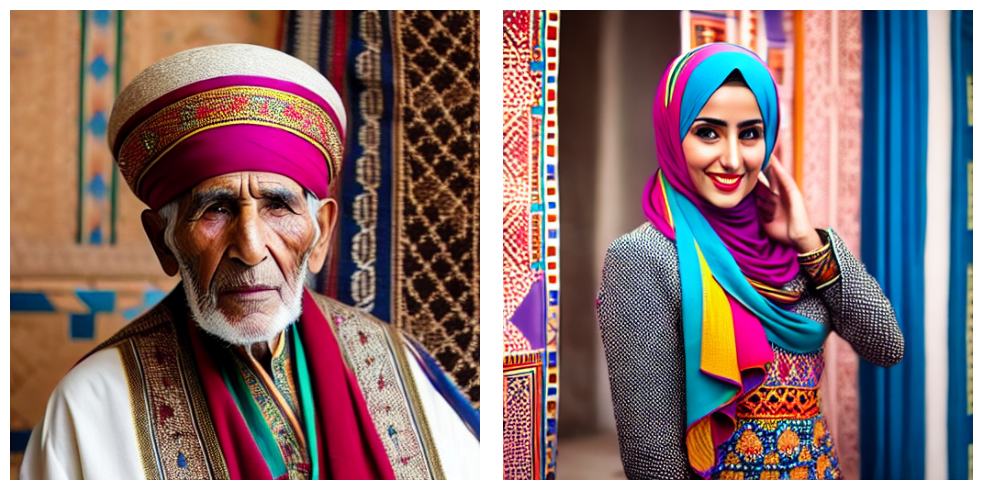

In [ ]:
import torch
from diffusers import StableDiffusionPipeline
import matplotlib.pyplot as plt

class MoroccanPortraitGenerator:
    def __init__(self, model_id):
        self.pipe = self._setup_pipeline(model_id)

    def _setup_pipeline(self, model_id):
        pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16, use_safetensors=True)
        return pipe.to("cuda" if torch.cuda.is_available() else "cpu")

    def generate_portrait(self, prompt, params):
        images = self.pipe(prompt, **params).images
        return images[0] if len(images) == 1 else images

    @staticmethod
    def display_portraits(images):
        num_images = len(images)
        fig, axs = plt.subplots(1, num_images, figsize=(5*num_images, 5))

        if num_images == 1:
            axs = [axs]

        for ax, img in zip(axs, images):
            ax.imshow(img)
            ax.axis('off')

        plt.tight_layout()
        plt.show()

def main():
    model_id = "dreamlike-art/dreamlike-diffusion-1.0"
    generator = MoroccanPortraitGenerator(model_id)

    prompts = [
        "A dignified Moroccan elder with traditional fez hat, intricate caftan, wise eyes, detailed wrinkles",
        "Young Moroccan woman in colorful hijab, modern clothing mixed with traditional elements, confident pose"
    ]

    params = {
        'num_inference_steps': 50,
        'width': 512,
        'height': 512,
        'negative_prompt': 'ugly, distorted, low quality',
        'num_images_per_prompt': 1
    }

    portraits = []
    for prompt in prompts:
        print(f"[PROMPT]: {prompt}")
        portrait = generator.generate_portrait(prompt, params)
        portraits.append(portrait)

    generator.display_portraits(portraits)

if __name__ == "__main__":
    main()

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

[PROMPT]: A breathtaking Moroccan landscape, Atlas Mountains in the background, lush oasis in the foreground, traditional Berber village, vibrant sunset colors


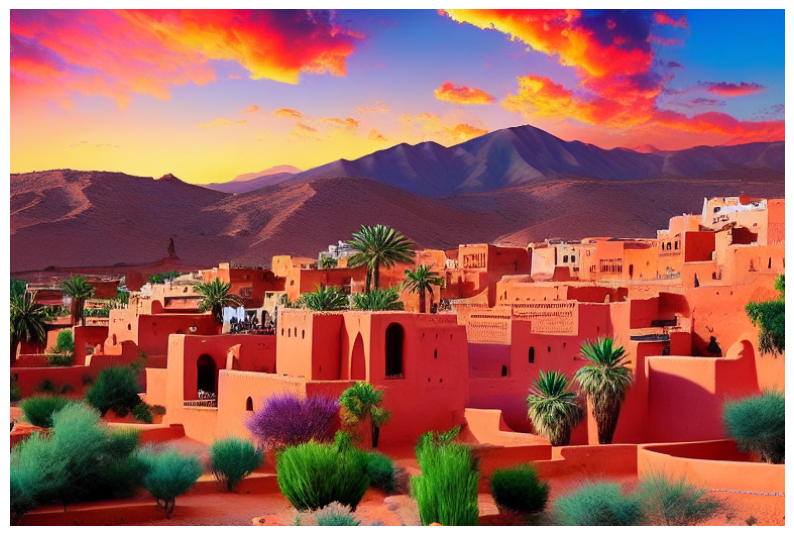

In [ ]:
import torch
from diffusers import StableDiffusionPipeline
import matplotlib.pyplot as plt

def setup_pipeline(model_id):
    pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16, use_safetensors=True)
    return pipe.to("cuda" if torch.cuda.is_available() else "cpu")

def generate_image(pipe, prompt, params):
    images = pipe(prompt, **params).images
    return images[0] if len(images) == 1 else images

def display_image(image):
    plt.figure(figsize=(10, 10))
    plt.imshow(image)
    plt.axis('off')
    plt.show()

def main():
    model_id = "dreamlike-art/dreamlike-diffusion-1.0"
    pipe = setup_pipeline(model_id)

    prompt = "A breathtaking Moroccan landscape, Atlas Mountains in the background, lush oasis in the foreground, traditional Berber village, vibrant sunset colors"
    params = {
        'num_inference_steps': 50,
        'width': 768,
        'height': 512,
        'negative_prompt': 'low quality, blurry, distorted'
    }

    image = generate_image(pipe, prompt, params)
    print(f"[PROMPT]: {prompt}")
    display_image(image)

if __name__ == "__main__":
    main()